In [2]:
import os
import zipfile

### Data Loading

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O ./data/rps.zip
    
    
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O ./data/rps-test-set.zip

--2020-10-03 15:54:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128, 172.253.116.128, 209.85.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./data/rps.zip’

./data/rps.zip      100%[===================>] 191.38M  68.6MB/s    in 2.8s    

2020-10-03 15:54:32 (68.6 MB/s) - ‘./data/rps.zip’ saved [200682221/200682221]

--2020-10-03 15:54:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.203.128, 74.125.193.128, 172.253.116.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to

In [3]:
local_zip = './data/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/')
zip_ref.close()

local_zip = './data/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('./data/rps/rock')
paper_dir = os.path.join('./data/rps/paper')
scissors_dir = os.path.join('./data/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-078.png', 'rock07-k03-074.png', 'rock01-113.png', 'rock04-101.png', 'rock05ck01-036.png', 'rock02-033.png', 'rock02-099.png', 'rock02-008.png', 'rock04-033.png', 'rock02-014.png']
['paper06-059.png', 'paper06-009.png', 'paper01-003.png', 'paper06-004.png', 'paper06-076.png', 'paper05-096.png', 'paper05-064.png', 'paper01-096.png', 'paper06-063.png', 'paper06-048.png']
['scissors01-082.png', 'scissors04-118.png', 'scissors02-037.png', 'testscissors03-008.png', 'scissors04-055.png', 'scissors04-113.png', 'testscissors01-011.png', 'scissors04-112.png', 'scissors04-108.png', 'testscissors02-052.png']


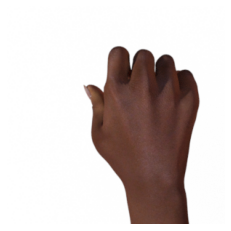

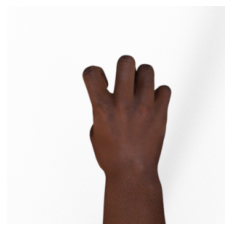

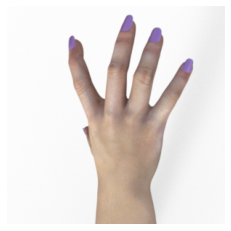

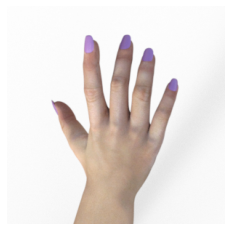

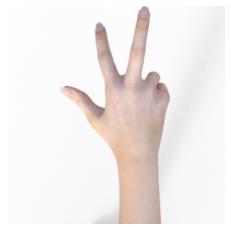

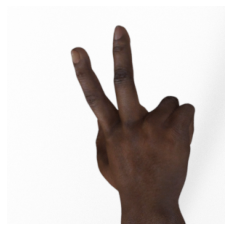

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  # print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Data Preprocessing

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [8]:
TRAINING_DIR = "./data/rps/"

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126)

Found 2520 images belonging to 3 classes.


In [9]:
VALIDATION_DIR = "./data/rps-test-set/"

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126)

Found 372 images belonging to 3 classes.


### Model Definition

In [10]:
# Defines the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

In [11]:
# Compiles the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [12]:
# Fits the model
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data=validation_generator, 
                    verbose=1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 41s 2s/step - loss: 1.7515 - acc: 0.3433 - val_loss: 1.0870 - val_acc: 0.3333
Epoch 2/25
20/20 [==============================] - 20s 1s/step - loss: 1.1008 - acc: 0.3841 - val_loss: 1.0609 - val_acc: 0.4086
Epoch 3/25
20/20 [==============================] - 20s 1s/step - loss: 1.1537 - acc: 0.4448 - val_loss: 0.9124 - val_acc: 0.8091
Epoch 4/25
20/20 [==============================] - 20s 1s/step - loss: 0.9289 - acc: 0.5560 - val_loss: 2.4676 - val_acc: 0.3710
Epoch 5/25
20/20 [==============================] - 20s 1s/step - loss: 0.9560 - acc: 0.6091 - val_loss: 0.6958 - val_acc: 0.6559
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 0.7489 - acc: 0.6690 - val_loss: 0.4445 - val_acc: 0.7177
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 0.6556 - acc: 0.7032 - val_loss: 0.7947 - val_acc: 0.5887
Epoch 8/25
20/20 [==============================] - 21s 1s/step - loss: 0.5617 - acc: 0.75

In [ ]:
model.save("./models/rps.h5")

### Model Evaluation

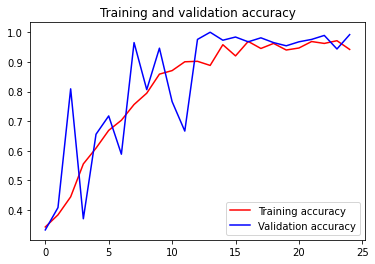

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()